## Ridge Regression

#### TL;DR

In [4]:
from sklearn.preprocessing import StandardScaler # Feature transformation 
from sklearn.linear_model import Ridge # Algorithm|

In [6]:
scaler = StandardScaler(copy=True, 
                        with_mean=True, 
                        with_std=True)
ALG = Ridge(alpha=1.0, 
            fit_intercept=True, 
            normalize=False, 
            copy_X=True, 
            max_iter=None, 
            tol=0.001, 
            solver='auto',
            random_state=None)
scaler, ALG

(StandardScaler(copy=True, with_mean=True, with_std=True),
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001))

### 1. Example with code

In [7]:
# Load cleaned and preprocessed CSV file as a dataframe.
# ------------------------------------------------------
import os # Files
import pandas as pd # Tables
import matplotlib.pyplot as plt # Plots
from sklearn.model_selection import train_test_split # ML

fp = os.path.join('', 'tweets_sentiment.csv')    # Open file
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # Load as dataframe

<b>Example problem</b>: Predict tweet sentiment basing on it's  nr of hashtags, retweet and like counts. 

<b>Example data</b>: consists of 3800 tweets obtained by twitter search API on phrases like psychology + AI (and simillar) saved and cleaned previously as a tweets_sentiment.csv file. Features:

In [8]:
df.head(3)

,tweet,hashtags,hashtags_number,likes,retweets,sentiment,sentiment_class
0,vanguardsw rt chboursin ai achieve human like ...,human-like skills,2,0,7,0.2200,Positive
1,windy interview really groundbreaking can t wr...,interview groundbreaking. head DeepState reali...,6,0,3,0.2000,Positive
2,ai s top researchers think artificial general ...,ai’s ai artificialintelligence agi human,5,1,0,-0.0125,Negative


- <b>tweet</b>           - tweet text.
- <b>hashtags</b>        - #hashtags in a tweet.
- <b>hashtags_number</b> - number of hashtags.
- <b>likes</b>           - number of tweet likes 
- <b>retweets</b>        - number of times tweet have been shared.
- <b>sentiment</b>       - score in range: -1.0 to 1.0 .
- <b>sentiment_class</b> - score simplified to: Positive ( > 0) and Negative ( < 0).

<b>Example code:</b>

R-squared - train: 0.02
R-squared - test:  0.02
Coefficient: [0.04280413 0.00098121]
Intercept:  0.11091065238213316
First three predictions (of 950): [0.17535184 0.24105988 0.22228116] ...


/home/luke/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/luke/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/luke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


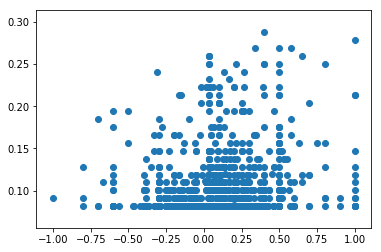

In [9]:
# Ridge Regression

# Divide data into features(X) and labels(y).
X =  df.loc[ :, ['hashtags_number','retweets']] # features
y =  df.loc[ :, 'sentiment'] # label, value to predict

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Transform features: normalization
scaler = StandardScaler(copy=True, 
                        with_mean=True, 
                        with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Load and define Ridge Regression.
RR = Ridge(alpha=1.0, 
           fit_intercept=True, 
           normalize=False, 
           copy_X=True, 
           max_iter=None, 
           tol=0.001, 
           solver="cholesky", 
           random_state=None)

# Fit data into model.
RR.fit(X_train_scaled, y_train, sample_weight=None)

# Results.
coef = RR.coef_
intercept = RR.intercept_
r_squared_train = round(RR.score(X_train_scaled, y_train), 2)
r_squared_test  = round(RR.score(X_test_scaled,  y_test), 2)
predictions = RR.predict(X_test_scaled) # an array.

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 2. Key info
- Linear model
- Find coefficients, most optimal weights and bias for input features.
- Model decides on base of metric: MSE, MAE
- Before: remove noise and very correlated variables
- Well known and understood
- Optimised (fg. GD) provides good performance on large number of features. Good for text data, as n-grams.
- Fundament for many algorithms and building block of Multiple Linear Regression.
- can use fg. gradient descent optimization (more efficent in case of many features) or linear algebra solution ordinary least squares.
-  Regularisations: Ridge, Lasso (anti overfitting fg. by adding to loss function two sums: of modules weights and squares of weights).
- [ADD MORE],
- (To be updated.)

### 3. Quick use template

In [ ]:
import os # Get file
import pandas as pd # Read as pandas table; dataframe (df).
from sklearn.model_selection import train_test_split # Train/Test set divide.
from sklearn.preprocessing import StandardScaler # Feature transformation 
from sklearn.linear_model import Ridge # Algorithm
import matplotlib.pyplot as plt # Plots

# You fill three lines below.
# ---------------------------
file_name   = 'your file_name.csv' # csv file in same dir  as this notebook.
predit_what = 'column_name' # The label to predict.
based_on    = ['column_name', 'column_name'] # The features to use in this quest.

# Modify if you want to specify full file path / use existing dataframe. 
fp = os.path.join('', file_name) # fp = 'home/data/file_path.csv'
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # df = my_df 


# Ridge Regression

# Divide data into features(X) and labels(y).
X =  df.loc[ :, based_on]    # features
y =  df.loc[ :, predit_what] # label


# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Transform features: normalization
scaler = StandardScaler(copy=True, 
                        with_mean=True, 
                        with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Load and define Ridge Regression.
RR = Ridge(alpha=1.0, 
           fit_intercept=True, 
           normalize=False, 
           copy_X=True, 
           max_iter=None, 
           tol=0.001, 
           solver="cholesky", 
           random_state=None)

# Fit data into model.
RR.fit(X_train_scaled, y_train, sample_weight=None)

# Results.
coef = RR.coef_
intercept = RR.intercept_
r_squared_train = round(RR.score(X_train_scaled, y_train), 2)
r_squared_test  = round(RR.score(X_test_scaled,  y_test), 2)
predictions = RR.predict(X_test_scaled) # an array.

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

#### Nobody aint got time for comments?

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

fp = os.path.join('', 'your file_name.csv')
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

X =  df.loc[ :, ['feature_column_name', 'feature_column_name']]
y =  df.loc[ :, 'label_column_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RR = Ridge(alpha=10.0, solver="cholesky").fit(X_train_scaled, y_train)

coef = RR.coef_
intercept = RR.intercept_
r_squared_train = round(RR.score(X_train_scaled, y_train), 2)
r_squared_test  = round(RR.score(X_test_scaled,  y_test), 2)
predictions = RR.predict(X_test_scaled) # an

print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 4. More

To be updated.

By Luke, 13 II 2019.